In [1]:
# imports
import numpy as np
import scipy
from scipy.stats import norm, truncnorm
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.ion()

In [3]:
# Initial parameters for the distributions.
# height distribution
h_mu = 163
h_sigma = 10
# IQ distribution
q_mu = 100
q_sigma = 15

Text(0, 0.5, 'frequency')

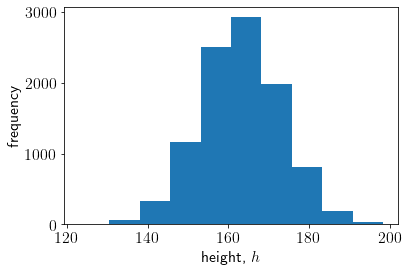

In [4]:
# random samples from height distribution
h_rvs = norm.rvs(loc=h_mu, scale=h_sigma, size=10000) 
plt.hist(h_rvs) # histogram of the samples
# label axes
plt.xlabel("height, $h$")
plt.ylabel("frequency")

In [5]:
# define a function for the PDF
def norm_pdf(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x-mu)/sigma)**2)/sigma/np.sqrt(2 * np.pi)

Text(0, 0.5, '$\\rho(h)$')

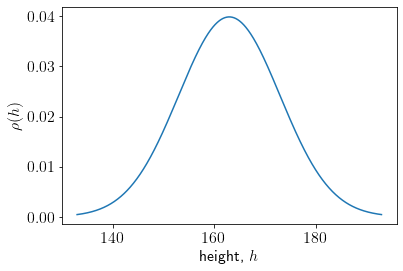

In [6]:
x = np.linspace(h_mu-3*h_sigma, h_mu+3*h_sigma, 1000)
y = norm_pdf(x, mu=h_mu, sigma=h_sigma)
plt.plot(x, y)
plt.xlabel("height, $h$")
plt.ylabel("$\\rho(h)$")

Text(0, 0.5, 'frequency')

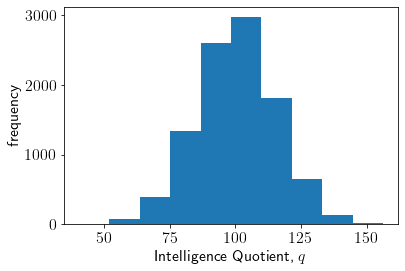

In [7]:
# random samples from the IQ distribution
q_rvs = norm.rvs(loc=q_mu, scale=q_sigma, size=10000)
plt.hist(q_rvs)
plt.xlabel("Intelligence Quotient, $q$")
plt.ylabel("frequency")

Text(0, 0.5, 'Intelligence Quotient, $q$')

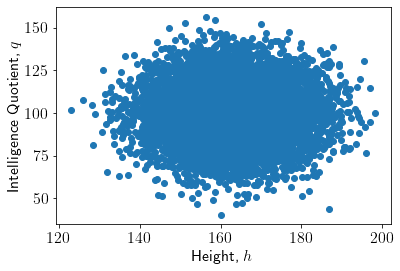

In [8]:
# plotting samples from both distributions
plt.scatter(h_rvs, q_rvs)
plt.xlabel("Height, $h$")
plt.ylabel("Intelligence Quotient, $q$")

In [9]:
# sampling from a multi-variate distribution 
mean_vect = np.array([163, 100])
std_dev_vect = np.array([10, 15])
lower = np.array([140, 80])
upper = np.array([180, 150])

In [10]:
# sampling from a Truncated Normal distribution
def tnorm_rvs(mean_vect, sigma_vect, lower, upper, size=1000):
    a, b = (lower - mean_vect)/std_dev_vect, (upper - mean_vect)/std_dev_vect
    samples = np.zeros(shape=(size, len(mean_vect)))
    for i in range(len(mean_vect)):
        samples[:,i] = truncnorm.rvs(a[i], b[i], loc=mean_vect[i], 
                        scale=sigma_vect[i], size=size)
    return samples

In [11]:
Y = tnorm_rvs(mean_vect, std_dev_vect, lower, upper)

Text(0, 0.5, 'IQ, $q$')

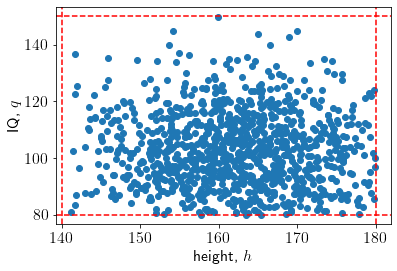

In [12]:
plt.scatter(Y[:,0], Y[:,1])
plt.axvline(lower[0], color="red", ls="dashed")
plt.axvline(upper[0], color="red", ls="dashed")
plt.axhline(lower[1], color="red", ls="dashed")
plt.axhline(upper[1], color="red", ls="dashed")
plt.xlabel("height, $h$")
plt.ylabel("IQ, $q$")